# Tugas Besar IF2220 Probabilitas dan Statistika 
Penarikan Kesimpulan dan Pengujian Hipotesis 

1. Eduardus Alvito Kristiadi - 13522004
2. Francesco Michael Kusuma - 13522038



# Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy
from scipy.stats import skew 
from scipy.stats import kurtosis 
import seaborn as sns

data_path = "../data/candy.csv"
df = pd.read_csv(data_path)

# MISSING VALUES
def missing_values(data):
    misval = df.isnull().sum(axis = 0)
    nan_cols = misval[misval > 0]
    return len(nan_cols)

def info(data):
    return data.info()

numeric_columns = df.select_dtypes(include=['number'])
non_numeric_columns = df.select_dtypes(exclude=['number'])


def numeric_data_describe(data):
    return data.describe()

def mean_dewe(data):
    total_sum = 0
    count = 0
    for number in data:
        total_sum += number
        count += 1
    mean = total_sum / count
    return mean

def median_dewe(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    middle = n // 2
    if n % 2 == 0:
        median = (sorted_data[middle - 1] + sorted_data[middle]) / 2
    else:
        median = sorted_data[middle]
    return median

def modus_dewe(data):
    frequency = {}
    for item in data:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
    max_frequency = max(frequency.values())
    mode = [key for key, val in frequency.items() if val == max_frequency]

    return mode

def stdev_dewe(data):
    # Calculate the mean of the data
    mean = mean_dewe(data)
    kuad = [(x - mean) ** 2 for x in data]
    variansi = sum(kuad) / len(data)
    standard_deviation = variansi ** 0.5
    return standard_deviation

def variansi_dewe(data):
    mean = mean_dewe(data)
    kuad = [(x - mean) ** 2 for x in data]
    variansi = sum(kuad) / len(data)
    return variansi

def range_dewe(data):
    max_value = max_dewe(data)
    min_value = min_dewe(data)
    data_range = max_value - min_value
    return data_range

def max_dewe(data):
    max_value = data[0]
    for value in data:
        if value > max_value:
            max_value = value
    return max_value

def min_dewe(data):
    min_value = data[0]
    for value in data:
        if value < min_value:
            min_value = value
    return min_value

def quartil_dewe(data, kuartil_number):
    sorted_data = sorted(data)
    n = len(sorted_data)
    median_index = n // 2
    q2 = sorted_data[median_index]
    if n % 2 == 1:
        lower_half = sorted_data[:median_index]
        upper_half = sorted_data[median_index + 1:]
    else:
        lower_half = sorted_data[:median_index]
        upper_half = sorted_data[median_index:]
    
    if kuartil_number == 1:
        half = lower_half
    elif kuartil_number == 2:
        half = sorted_data
    elif kuartil_number == 3:
        half = upper_half
    else:
        raise ValueError("Invalid quartile number. Please choose 1, 2, or 3.")

    half_length = len(half)
    q_index = half_length // 2
    q = half[q_index] if half_length % 2 == 1 else (half[q_index - 1] + half[q_index]) / 2
    
    return q

def iqr_dewe(data):
    # Calculate quartiles
    q1 = quartil_dewe(data,1)
    q3 = quartil_dewe(data,3)
    
    # Calculate IQR
    iqr = q3 - q1
    
    return iqr

def skewness_dewe(data):
    mean = mean_dewe(data)
    std_dev = stdev_dewe(data)
    n = len(data)
    skewness = (sum((x - mean) ** 3 for x in data) * n) / ((n - 1) * (n - 2) * std_dev ** 3)
    return skewness

def kurtosis_dewe(data):
    mean = mean_dewe(data)
    std_dev = stdev_dewe(data)
    n = len(data)
    kurtosis = (sum((x - mean) ** 4 for x in data) * n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3) * std_dev ** 4) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurtosis

def unique_value_dewe(data):
    unique_values = set(data)
    return unique_values

def values_dewe(data):
    counts = {}
    for value in data:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    proportions = {key: count for key, count in counts.items()}
    return proportions

def proporsi_dewe(data):
    counts = {}
    for value in data:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    total_elements = len(data)
    proportions = {key: count / total_elements for key, count in counts.items()}
    return proportions

def numeric_all(data):
    print("NUMERICAL\n")
    print("FUNCTION2 BUATAN")
    print(f"Mean : {mean_dewe(data)}")
    print(f"Median : {median_dewe(data)}")
    print(f"Modus : {modus_dewe(data)}")
    print(f"Standard Deviasi : {stdev_dewe(data)}")
    print(f"Variansi : {variansi_dewe(data)}")
    print(f"Range : {range_dewe(data)}")
    print(f"Nilai Minimum : {min_dewe(data)}")
    print(f"Nilai Maksimum : {max_dewe(data)}")
    print(f"Kuartil 1 : {quartil_dewe(data,1)}")
    print(f"Kuartil 2 : {quartil_dewe(data,2)}")
    print(f"Kuartil 3 : {quartil_dewe(data,3)}")
    print(f"IQR : {iqr_dewe(data)}")
    print(f"Skewness : {skewness_dewe(data)}")
    print(f"Kurtosis : {kurtosis_dewe(data)}")

    print()
    print("FUNCTION2 BAWAAN")
    print(f"Mean : {data.mean()}")
    print(f"Median : {data.median()}")
    print(f"Modus : {statistics.mode(data)}")
    print(f"Standard Deviasi : {statistics.stdev(data)}")
    print(f"Variansi : {statistics.variance(data)}")
    print(f"Range : {max(data) - min(data)}")
    print(f"Nilai Minimum : {min(data)}")
    print(f"Nilai Maksimum : {max(data)}")
    print(f"Kuartil 1 : {np.percentile(data, 25)}")
    print(f"Kuartil 2 : {np.percentile(data, 50)}")
    print(f"Kuartil 3 : {np.percentile(data, 75)}")
    print(f"IQR : {np.percentile(data, 75) - np.percentile(data, 25)}")
    print(f"Skewness : {skewness_dewe(data)}")
    print(f"Kurtosis : {kurtosis_dewe(data)}")

def nonnumeric_all(data):
    print("NON NUMERICAL\n")
    print(f"Unique Values : {unique_value_dewe(data)}")
    print("Values : ")
    print(values_dewe(data))
    print(f"Proporsi : {proporsi_dewe(data)}")


def handleOutlier(df, data):
    upperBound = np.percentile(data, 75) + 1.38 * iqr_dewe(data)
    lowerBound = np.percentile(data, 25) - 1.62 * iqr_dewe(data)
    loadClean = df[(data >= lowerBound) & (data <= upperBound)]
    return loadClean

In [15]:
numcols = df.select_dtypes(include=['number'])
numcols


,Unnamed: 0,Calories,Serving,Protein,Sugar,Sodium,Fat,Fiber,Popularity
0,0,199.093472,38.515232,1.900459,19.853806,74.674097,7.587634,0.138605,41.259773
1,1,200.593259,40.938412,2.808666,21.640665,76.748829,6.332619,0.569315,44.089254
2,2,200.809089,40.107873,1.863457,20.106473,73.822751,6.377162,0.294916,46.941862
3,3,199.505615,39.529170,2.819872,19.026629,73.351009,5.971648,0.181527,53.331791
4,4,199.398557,39.840058,2.603907,21.735672,76.422204,6.924652,0.530055,48.471775
...,...,...,...,...,...,...,...,...,...
1995,1995,199.469890,41.409594,1.426827,19.900369,74.947492,7.297713,0.264281,32.993853
1996,1996,198.775889,41.219983,1.565405,19.701805,74.793927,6.226603,0.741278,61.284063
1997,1997,201.194004,38.044068,3.424172,19.600528,74.635503,6.831742,0.696798,57.484075
1998,1998,198.293784,40.357271,3.155686,20.645426,74.330803,6.250351,0.779107,66.672724


# NO 1
## Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya.

## CALORIES

In [23]:
numeric_all(df["Calories"])

FUNCTION2 BUATAN
Mean : 199.99604629501596
Median : 200.0013064923376
Modus : [199.09347183126908, 200.59325941276543, 200.8090894484849, 199.50561547161524, 199.3985565288196, 200.4390117509544, 201.699421486745, 200.5220040517069, 201.78706757133403, 200.1163566137771, 200.32221492589267, 200.953952699942, 201.24690975006823, 201.1377115137165, 200.2363417269477, 200.9279829614272, 201.8410878084229, 198.83729505067188, 199.4038403900608, 201.9840148027282, 200.69174545944813, 200.2669930145473, 200.26910011226303, 202.30275044986303, 200.6460286441467, 200.073365165202, 200.6994877757516, 201.29060586683744, 198.8512835512541, 199.08129872089447, 198.37794205173745, 200.34978304050316, 199.8348543549699, 203.0819755126608, 199.04429689251415, 200.2851369158468, 199.93358743733, 198.57904431831471, 199.6637052233766, 198.6678859666084, 201.1988300455092, 200.36718250078985, 200.64490823844363, 199.10748746229928, 200.0484698986216, 200.9476197718768, 199.4343816642696, 199.1691054212

## SERVING

In [24]:
numeric_all(df["Serving"])

FUNCTION2 BUATAN
Mean : 39.98913901365215
Median : 39.97785507964272
Modus : [38.51523235084767, 40.93841206760628, 40.10787340412775, 39.52917018206988, 39.84005838707783, 39.36330119918723, 40.99361889141158, 39.43477257157979, 38.09113464190512, 40.57766576459889, 39.27023211946042, 39.06426294751383, 38.24290004157947, 39.63681387349125, 40.89026007685843, 39.3422552255999, 39.29393036269185, 41.06220796044869, 40.00763173835669, 40.263764109289056, 38.94045717801091, 42.57630398337119, 39.49166623010179, 39.62954481515739, 39.85927907953156, 40.057422295864896, 38.83702068738227, 39.071689721672776, 40.06601488899825, 38.75246019008837, 40.74964544418342, 40.35917381502358, 38.73534846631318, 39.04701231377865, 41.85772809288759, 40.36932411810311, 40.08790531819436, 39.92945651218978, 39.29585190837128, 38.99910089028226, 37.2581848147389, 40.34998752289575, 40.35651870234655, 41.31222465027314, 40.57111872778681, 41.28987771103706, 40.14610295509293, 39.55768695112541, 40.277333

## PROTEIN

In [33]:
numeric_all(df["Protein"])

FUNCTION2 BUATAN
Mean : 2.9744154518101014
Median : 2.9791766226154905
Modus : [1.9004592049003064, 2.808665884797752, 1.8634569991687309, 2.8198715751738934, 2.60390738765119, 3.675899556845052, 2.7196865850012486, 3.615796501048775, 4.142337493144192, 3.856300218287154, 2.883643986024482, 3.444881196288204, 2.59555588136444, 5.258422355135275, 2.249418149981232, 4.194313085295301, 4.762931566421898, 2.448540873787399, 3.2540675675830766, 4.751412709701123, 2.0713654067246488, 2.865364690676644, 2.9709330536091434, 3.5229901399248837, 2.2983596953492644, 6.132917018802135, 1.4720536136669635, 4.456902519273315, 4.241555546527218, 2.2439213755331133, 1.3130718727550266, 4.046309428920977, 2.9048338629088413, 3.2819001684017297, 1.0651064058004371, 4.05057821929917, 3.890188834481737, 4.994432924296473, 3.3219779802935614, 3.4878689216124688, 3.5478416143259057, 3.992030329582471, 2.1804827321049545, 5.122063147656595, 2.2436738349465664, 2.069313734796913, 3.418864866579496, 2.55883697

## SUGAR

In [26]:
numeric_all(df["Sugar"])

FUNCTION2 BUATAN
Mean : 20.004080475121533
Median : 20.004797718945213
Modus : [19.85380645666327, 21.6406654965956, 20.10647292206897, 19.026628805641444, 21.735672436293804, 19.055817451118248, 18.796996002287457, 19.437172812090083, 20.531754448271176, 19.04359925363584, 19.388401949600823, 20.10901143540043, 19.580185729480952, 19.055237477920286, 21.136168148278227, 20.409421509399795, 20.434383030222293, 19.290619938455094, 19.819820521504287, 19.06486584299238, 19.10780488177137, 21.675770609809383, 19.421211028957234, 20.788552012645507, 19.18752398351557, 20.39606344126445, 20.49746131366413, 20.36111425934454, 18.935472166430426, 19.823417471605765, 19.840468038427336, 17.875818005634763, 20.30690848744043, 18.27936404493634, 19.584819105177743, 20.03156522549039, 19.04284449242488, 20.027064497021733, 20.856124925791253, 19.143527103286136, 19.517037403710447, 20.235524039437088, 20.492177384491505, 20.05986192546189, 21.085746638967077, 20.02583165974233, 19.89634266661181,

## SODIUM

In [27]:
numeric_all(df["Sodium"])

FUNCTION2 BUATAN
Mean : 74.98285325941927
Median : 75.00005552352933
Modus : [74.67409658198929, 76.74882892287327, 73.82275148619661, 73.35100940642384, 76.42220438600938, 73.65439890344557, 74.56154432059145, 75.5768672884921, 74.87372762848382, 73.48972016793223, 75.78878616173803, 76.53100181459125, 76.43614108733298, 73.48481881624559, 74.42503689929838, 75.56036656551778, 75.45000469943145, 75.84139557348483, 75.92655414242749, 74.708822363557, 76.09004034368763, 74.83731541607604, 75.29794622872866, 73.61702454232233, 74.69114098665825, 73.19305535356831, 75.20680407265378, 74.43688441000052, 74.17014304031676, 74.73027947333729, 74.81456269079477, 77.1690645360268, 75.02754382161841, 76.49980344717476, 76.79881340238003, 74.96012782823863, 75.15815205521662, 75.60115500129426, 73.80258858194094, 73.62400362408394, 75.3839857122257, 74.04739538355, 75.26930973158461, 74.74728418421998, 73.8126068980396, 74.40183518018416, 74.33518398378884, 74.71182757384818, 73.49714058161881, 

## FAT

In [29]:
numeric_all(df["Fat"])

FUNCTION2 BUATAN
Mean : 6.7482261236433585
Median : 6.66772642900202
Modus : [7.587634359063427, 6.332618978204674, 6.377162225850564, 5.971648078150741, 6.924651789139397, 7.685946356835558, 6.274144666679445, 6.28762495306183, 6.230035628279697, 8.419218946655525, 5.887843139275306, 6.3230162937752326, 6.283528994964282, 6.317472213081183, 7.509224154109747, 6.650456197048382, 6.183409463352006, 7.307154424991324, 6.553921529593617, 6.496370070647836, 6.766559353355025, 5.991701970252843, 6.275119562316219, 5.966197360864484, 6.333044518935031, 6.57600305819506, 6.9571802883678, 6.616832029664648, 8.009108484356668, 6.523006688333516, 6.205373975395359, 6.412554429679793, 7.19025835126426, 8.999874724535776, 6.720663997347913, 5.842774118995368, 5.651694786711852, 7.169902746022151, 7.987915831802209, 6.516680126995818, 6.393546400738576, 5.920112811850068, 6.1294618203775135, 7.0827613788529495, 6.494555008171287, 6.150420269621252, 7.470106963658851, 6.929589566346306, 7.5706662236

## FIBER

In [31]:
numeric_all(df["Fiber"])

FUNCTION2 BUATAN
Mean : 0.49085080147128635
Median : 0.4899014525263591
Modus : [0.1386052023094806, 0.5693149819988506, 0.2949158095761726, 0.1815274507482819, 0.5300545521336231, 0.992098156150152, 0.6006841842679759, 0.7085226135523374, 0.4503427347995312, 0.5014647280963125, 0.0514165455450048, 0.7839539972991927, 0.8466547903519722, 0.9084049291254976, 0.8353292351691468, 0.2886452045706834, 0.8661760124771793, 0.6807299071033802, 0.681041792024625, 0.4490867731658164, 0.8656621667296945, 0.8664930494791271, 0.6542775209328224, 0.1537357437307648, 0.0660430391419929, 0.3568150743626501, 0.3724137068120151, 0.0156041543780703, 0.2623267405327983, 0.607605768634083, 0.1065152993304278, 0.0075218050598537, 0.0136621978781542, 0.9726212063214476, 0.2181273896140253, 0.4479240874892023, 0.4406821781121431, 0.6308314500362472, 0.788494459800706, 0.0719668038985734, 0.5607492968064148, 0.6875618003761146, 0.7038784997665753, 0.5980495852091116, 0.5344973603928715, 0.4686662539432115, 0.3

## POPULARITY

In [32]:
numeric_all(df["Popularity"])

FUNCTION2 BUATAN
Mean : 49.967119449637636
Median : 49.95538526425401
Modus : [41.25977250504842, 44.08925381395023, 46.94186198060922, 53.33179095378511, 48.47177528828632, 48.7076255162617, 51.484401150362906, 57.92783214405809, 58.533989468018206, 62.95534745243875, 39.47744708429883, 41.96885286769505, 51.54655636566015, 59.68862326639622, 41.215906231458, 42.94251094015973, 58.24567543192469, 33.626420228682534, 31.49213235811965, 68.10672935364238, 45.8370904697161, 47.62403576712754, 66.41397894615227, 71.04243802270366, 54.35610181016233, 40.812471099610896, 63.42799950814285, 53.052690623411415, 53.39726974844613, 51.76654975422467, 52.74229377596248, 73.84510617336645, 31.681890712849487, 61.18583144444074, 51.30141492683778, 58.89304844946056, 44.41430823404078, 41.066698922027385, 50.06136888953121, 48.998927958927645, 39.86272251478216, 52.40978652705586, 61.34959900659186, 39.34675971999302, 46.63443763604644, 54.40399328212556, 58.2660407019812, 64.03955601872957, 45.726

In [35]:
numcols = df.select_dtypes(exclude=['number'])
numcols

,Flavour
0,Vanilla
1,Strawberry
2,Strawberry
3,Strawberry
4,Chocolate
...,...
1995,Strawberry
1996,Vanilla
1997,Chocolate
1998,Chocolate


## FLAVOUR

In [38]:
nonnumeric_all(df["Flavour"])

NON NUMERICAL

Unique Values : {'Chocolate', 'Vanilla', 'undefined', 'Strawberry'}
Values : 
{'Vanilla': 664, 'Strawberry': 656, 'Chocolate': 678, 'undefined': 2}
Proporsi : {'Vanilla': 0.332, 'Strawberry': 0.328, 'Chocolate': 0.339, 'undefined': 0.001}


# NO 2

### Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

``` Upper Bound : Q3 + 1.5 * IQR ```
``` Lower Bound : Q1 - 1.5 * IQR ```

### Lakukan Cleaning

``` Upper Bound : Q3 + 1.5 * IQR ```
``` Lower Bound : Q1 - 1.5 * IQR ```

In [16]:
clean1 = handleOutlier(df, df["Calories"])
clean2 = handleOutlier(clean1, clean1["Serving"])
clean3 = handleOutlier(clean2, clean2["Protein"])
clean4 = handleOutlier(clean3, clean3["Sugar"])
clean5 = handleOutlier(clean4, clean4["Sodium"])
clean6 = handleOutlier(clean5, clean5["Fat"])
clean7 = handleOutlier(clean6, clean6["Fiber"])
clean8 = handleOutlier(clean7, clean7["Popularity"])
clean8.drop(columns=df.columns[0], axis=1, inplace=True)

print(clean8)


        Calories    Serving   Protein      Sugar     Sodium       Fat  \
0     199.093472  38.515232  1.900459  19.853806  74.674097  7.587634   
1     200.593259  40.938412  2.808666  21.640665  76.748829  6.332619   
2     200.809089  40.107873  1.863457  20.106473  73.822751  6.377162   
3     199.505615  39.529170  2.819872  19.026629  73.351009  5.971648   
4     199.398557  39.840058  2.603907  21.735672  76.422204  6.924652   
...          ...        ...       ...        ...        ...       ...   
1995  199.469890  41.409594  1.426827  19.900369  74.947492  7.297713   
1996  198.775889  41.219983  1.565405  19.701805  74.793927  6.226603   
1997  201.194004  38.044068  3.424172  19.600528  74.635503  6.831742   
1998  198.293784  40.357271  3.155686  20.645426  74.330803  6.250351   
1999  200.045891  40.306882  1.709739  19.304767  72.693937  6.797929   

         Fiber     Flavour  Popularity  
0     0.138605     Vanilla   41.259773  
1     0.569315  Strawberry   44.089254  


C:\Users\Eduard\AppData\Local\Temp\ipykernel_14480\3796646970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean8.drop(columns=df.columns[0], axis=1, inplace=True)


# NO 3

### Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram.

In [19]:
import pandas as pd
import seaborn as sns

def create_histogram(dataframe, attribute):
    # Create histogram
    sns.histplot(data=dataframe, x=attribute, kde=True)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attribute}')
    plt.show()

def create_boxplot(dataframe, attribute):
    # Create box plot
    sns.boxplot(data=dataframe, y=attribute)
    plt.ylabel(attribute)
    plt.title(f'Box Plot of {attribute}')
    plt.show()

## CALORIES

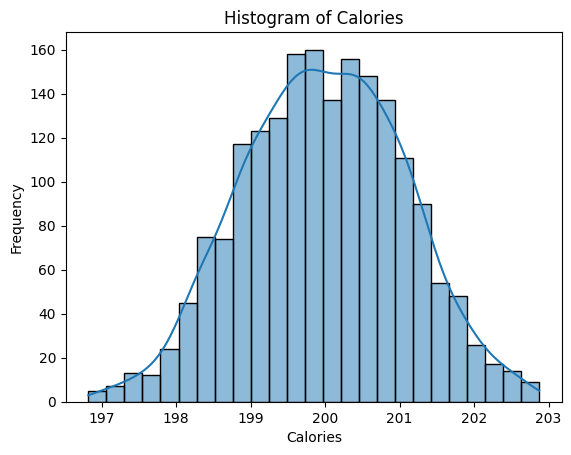

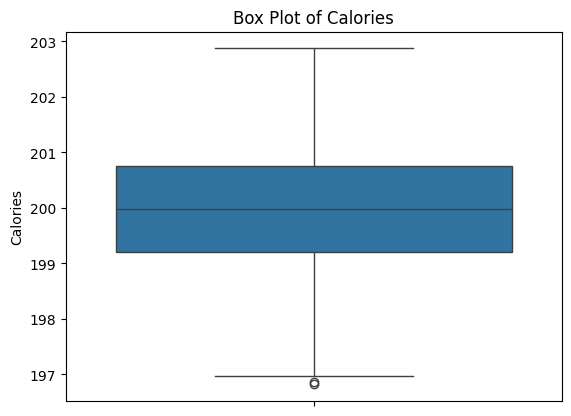

In [10]:
create_histogram(clean8, 'Calories')
create_boxplot(clean8, 'Calories')

## SERVING

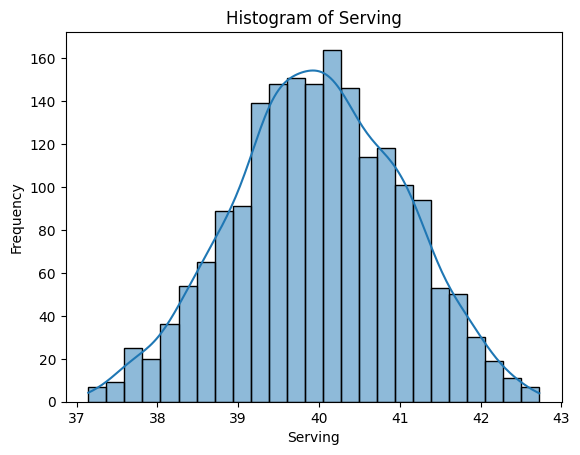

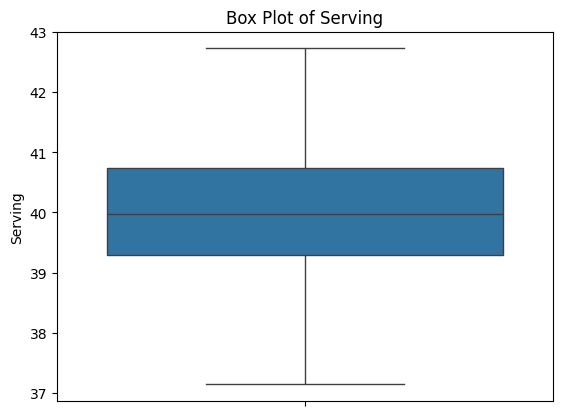

In [11]:
create_histogram(clean8, 'Serving')
create_boxplot(clean8, 'Serving')

## PROTEIN

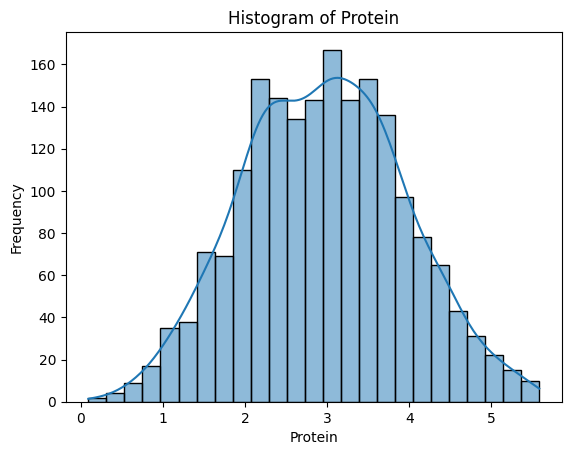

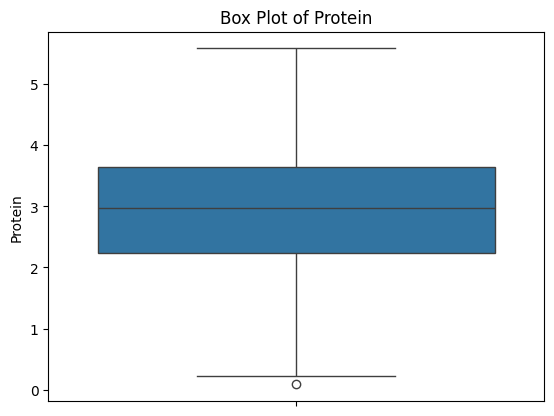

In [12]:
create_histogram(clean8, 'Protein')
create_boxplot(clean8, 'Protein')

## SUGAR

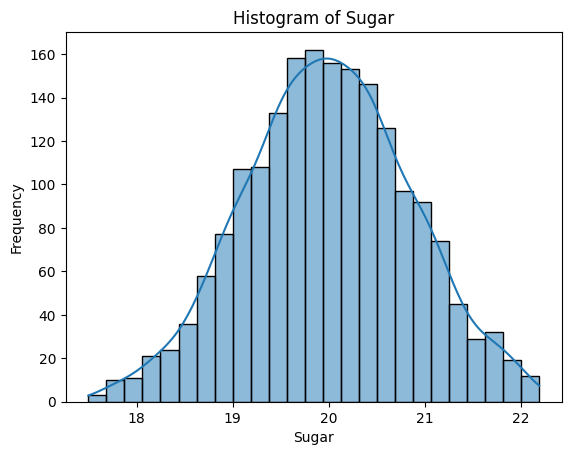

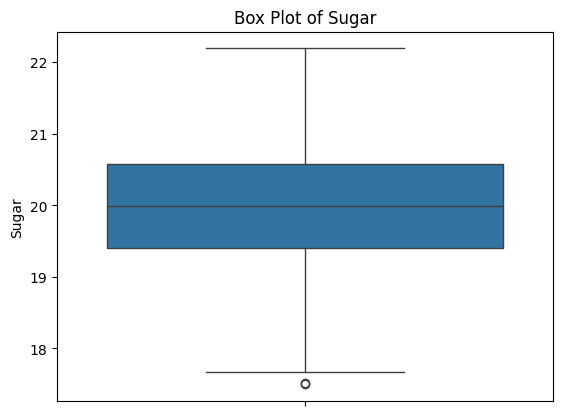

In [13]:
create_histogram(clean8, 'Sugar')
create_boxplot(clean8, 'Sugar')

## SODIUM

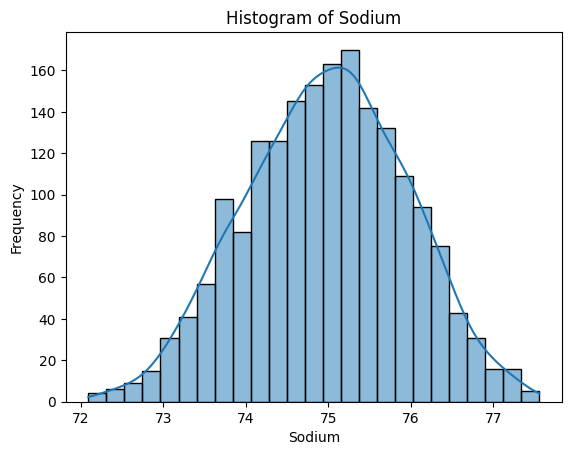

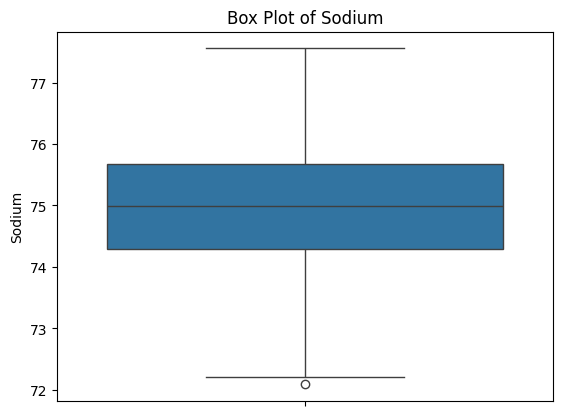

In [14]:
create_histogram(clean8, 'Sodium')
create_boxplot(clean8, 'Sodium')

## FAT

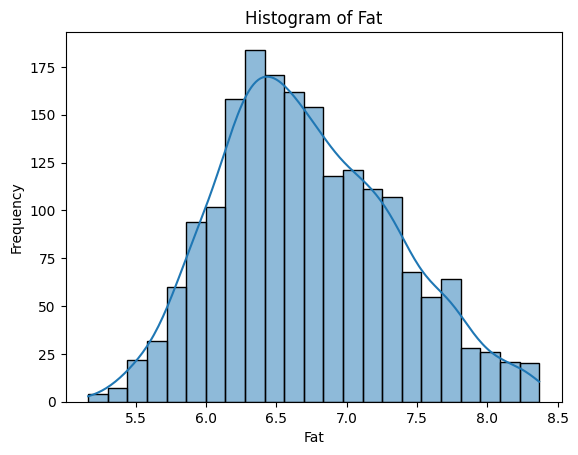

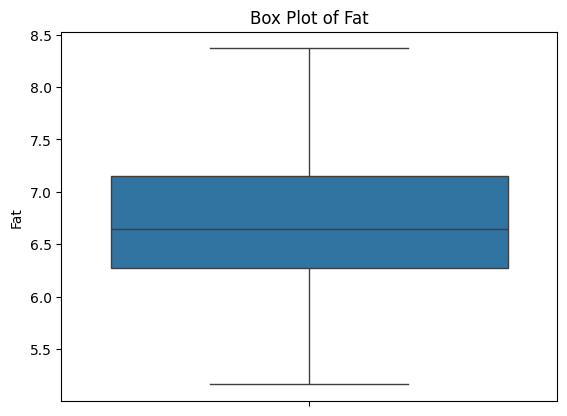

In [15]:
create_histogram(clean8, 'Fat')
create_boxplot(clean8, 'Fat')

## FIBER

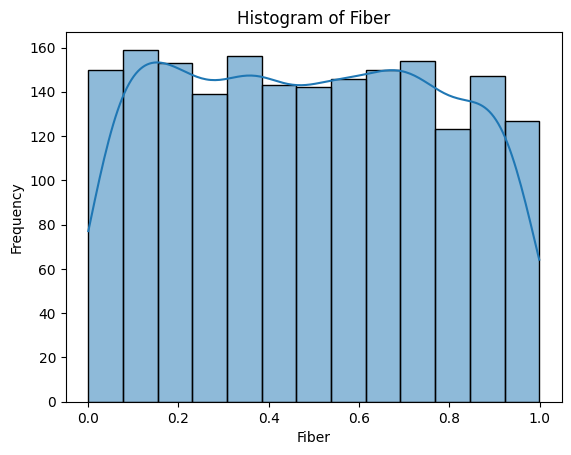

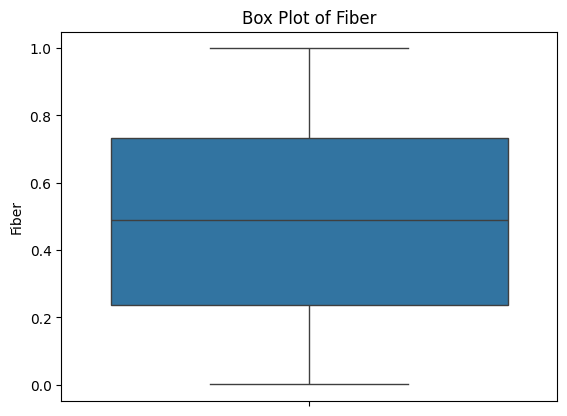

In [16]:
create_histogram(clean8, 'Fiber')
create_boxplot(clean8, 'Fiber')

## FLAVOUR

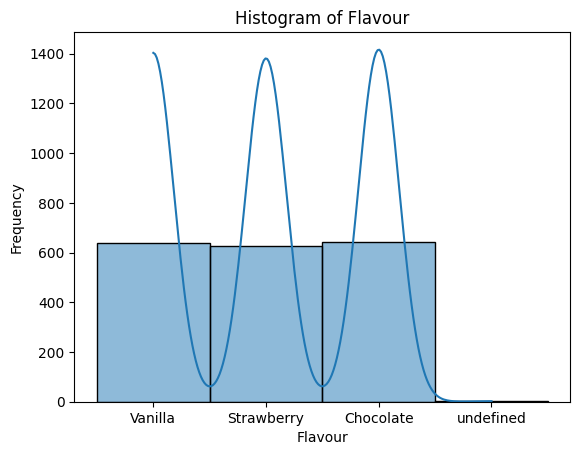

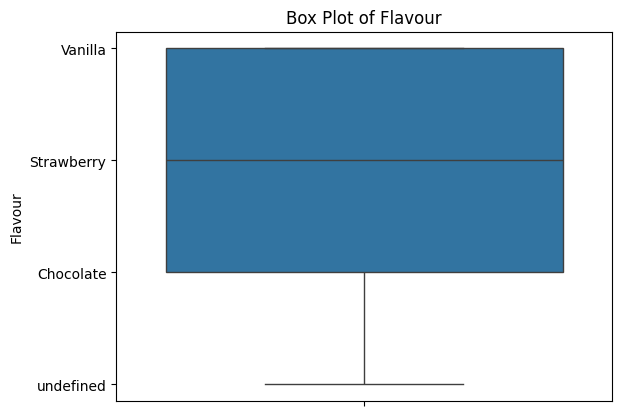

In [66]:
create_histogram(clean8, 'Flavour')
create_boxplot(clean8, 'Flavour')

## POPULARITY

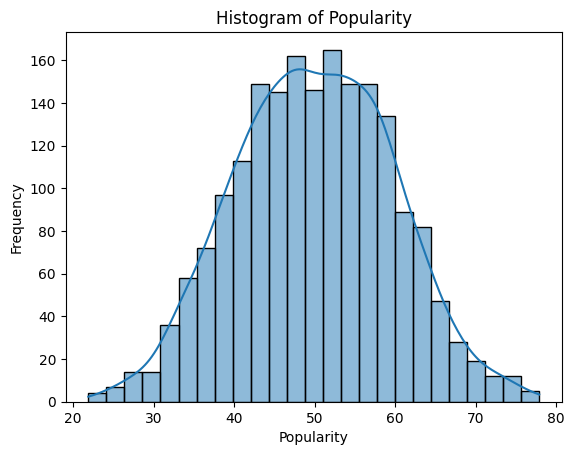

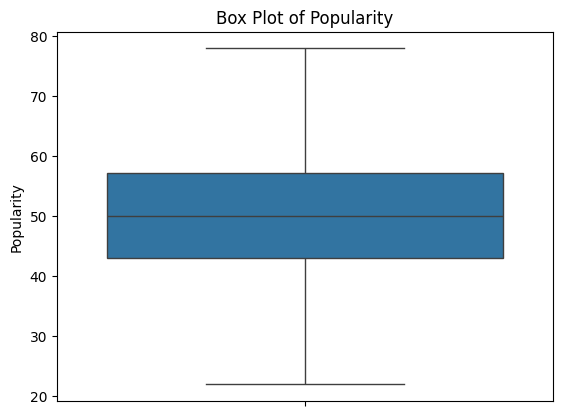

In [65]:
create_histogram(clean8, 'Popularity')
create_boxplot(clean8, 'Popularity')

# NO 4

### Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

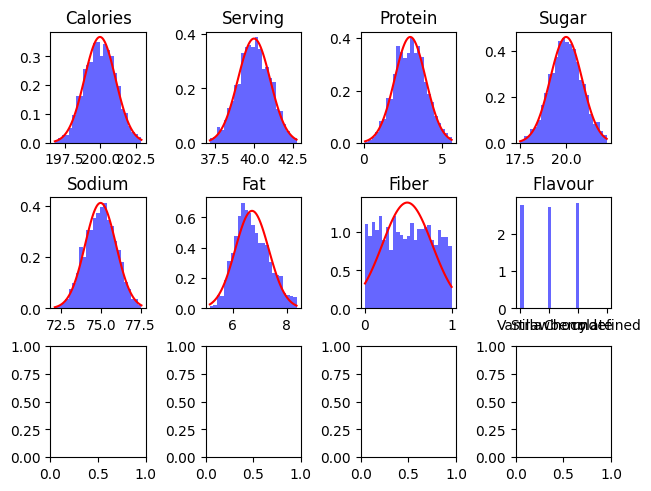

In [21]:
from scipy.stats import norm
 
fig, axes = plt.subplots(3, 4, constrained_layout=True)
columns = list(clean8.columns)

for i in range(3):
    for j in range(4):
        column_name = columns[4*i+j]
        axes[i,j].set_title(column_name)
        axes[i,j].hist(clean8[column_name], density=True, alpha=0.6, color='b', bins=25)
        x_min = clean8[column_name].min()
        x_max = clean8[column_name].max()

        x = np.linspace(x_min, x_max, 100)
        y = norm.pdf(x, loc=clean8[column_name].mean(), scale=clean8[column_name].std())
        axes[i,j].plot(x, y, color='r')
 
# Depict illustration
plt.show()

## CALORIES

### Berdasarkan visualisasi histogram Calories, 

## SERVING

## PROTEIN

## SUGAR

## SODIUM

## FAT

## FIBER

## FLAVOUR

## POPULARITY